[[-0.42804151  1.87762724  0.29483927 -3.08203775  3.09690586  3.05786342
  -2.83705966 -2.40097859  0.49283673 -2.72526706]
 [ 0.80139527  0.99089277 -1.04506916  0.98835648  2.77878411  0.78510872
   1.66292643 -2.53933588 -0.14389167  2.36472452]
 [-1.87307403  2.0319784   0.7071881   2.45637692 -1.99765637  0.55129696
  -2.25985722  1.54979793 -0.03468679  3.06183918]
 [ 1.09394896  1.94512672  2.1989932   0.52342595  1.2596481  -2.6884732
   0.73561318  2.00217982  2.03552602 -0.32526637]
 [-0.81169046 -2.67399741 -1.32511521 -0.31840844 -2.93947846 -1.51974546
  -0.31094273  2.21344097  3.07524114  2.33881985]
 [-1.1847032   0.83306709  3.09100531 -2.06206719  1.53274502 -2.35548816
   0.44776758 -2.07687485  2.97667056  2.31213655]
 [ 2.00668418  0.42298804  0.28626468  2.49058309  3.01561421 -0.01054689
   1.27801183  1.42194759 -2.18237553  2.21104808]
 [-2.6360234  -2.33668913 -1.66700653 -0.65324131  1.88873709  0.05342244
   0.85675617  1.23012077 -1.03262928  1.74873491]
 

C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


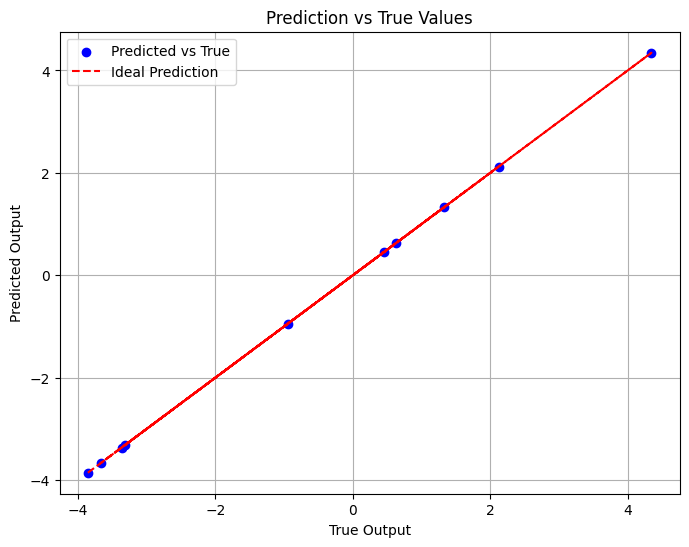

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Generate dataset based on a function y = sin(x1) + cos(x2) + noise
num_samples = 10  # Total samples
num_features = 10  # (5 x, y) coordinate pairs per sample

# Generate x and y values
X = np.random.uniform(-np.pi, np.pi, (num_samples, num_features))  # Inputs in range [-pi, pi]
print(X)
# Define true function: sum of sin and cos for different input pairs
Y_true = np.sum(np.sin(X[:, 0::2]) + np.cos(X[:, 1::2]), axis=1, keepdims=True)
print(Y_true)
# Define ANN model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(num_features,)),  # Hidden Layer 1
    layers.Dense(16, activation='relu'),  # Hidden Layer 2
    layers.Dense(1)  # Output layer (1 value per sample)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X, Y_true, epochs=200, batch_size=2, verbose=0)  # Train with more epochs for better accuracy

# Make predictions
Y_pred = model.predict(X)

# Plot Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(Y_true, Y_pred, color='blue', label="Predicted vs True")
plt.plot(Y_true, Y_true, 'r--', label="Ideal Prediction")
plt.xlabel("True Output")
plt.ylabel("Predicted Output")
plt.title("Prediction vs True Values")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

# Define input shapes
node_feature_dim = 10  # Example: Nodes have 10 features
element_feature_dim = 15  # Example: Elements have 15 features

# Define Node Feature Branch
node_input = Input(shape=(node_feature_dim,), name="Node_Input")
node_branch = Dense(64, activation="relu")(node_input)
node_branch = Dense(32, activation="relu")(node_branch)

# Define Element Feature Branch
element_input = Input(shape=(element_feature_dim,), name="Element_Input")
element_branch = Dense(64, activation="relu")(element_input)
element_branch = Dense(32, activation="relu")(element_branch)

# Merge branches
merged = Concatenate()([node_branch, element_branch])
merged = Dense(64, activation="relu")(merged)
merged = Dense(32, activation="relu")(merged)
output = Dense(1, activation="linear", name="Prediction_Output")(merged)  # Regression output

# Create model
model = Model(inputs=[node_input, element_input], outputs=output)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Node_Input          │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Element_Input       │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        704 │ Node_Input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      1,024 │ Element_Input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Prediction_Output   │ (None, 1)         │         33 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Node_Input', 'Element_Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


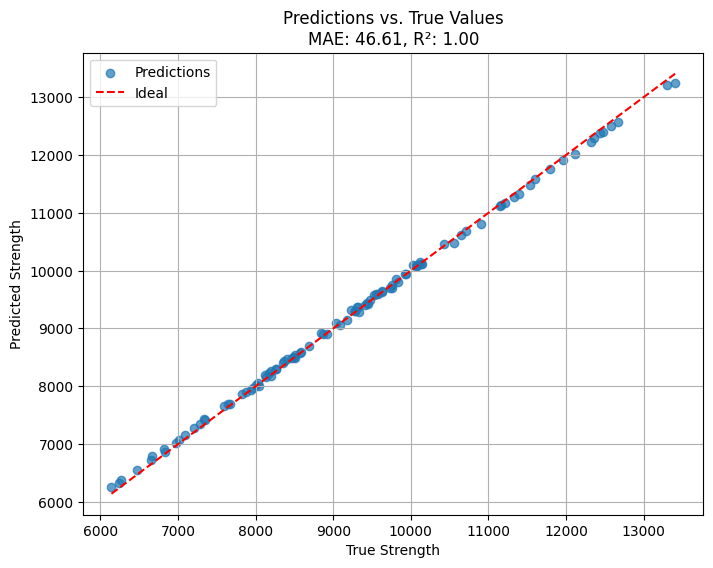

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 500

node_features = np.random.rand(num_samples, 10)
element_features = np.random.rand(num_samples, 15)

# Define random interaction weights
interaction_weights = np.random.rand(10, 15)

# Define scaling coefficients
alpha = 1.5
beta = 2.0
gamma = 5.0

# Compute strength using the new equation
true_strength = (
    np.einsum('ij,kj->i', node_features @ interaction_weights, element_features) +  # Interaction term
    alpha * np.sum(node_features**2, axis=1) +  # Node quadratic effect
    beta * np.sum(element_features**2, axis=1) +  # Element quadratic effect
    gamma +  # Bias term
    np.random.normal(0, 0.5, num_samples)  # Small noise for variability
)

# Split into training and testing sets
X_train_nodes, X_test_nodes, X_train_elements, X_test_elements, y_train, y_test = train_test_split(
    node_features, element_features, true_strength, test_size=0.2, random_state=42)

# Define multi-branch ANN
node_input = Input(shape=(10,), name="Node_Input")
node_branch = Dense(64, activation="relu")(node_input)
node_branch = Dense(32, activation="relu")(node_branch)

element_input = Input(shape=(15,), name="Element_Input")
element_branch = Dense(64, activation="relu")(element_input)
element_branch = Dense(32, activation="relu")(element_branch)

# Concatenate branches
merged = Concatenate()([node_branch, element_branch])
merged = Dense(64, activation="relu")(merged)
merged = Dense(32, activation="relu")(merged)
output = Dense(1, activation="linear", name="Prediction_Output")(merged)

# Create model
model = Model(inputs=[node_input, element_input], outputs=output)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train model
history = model.fit([X_train_nodes, X_train_elements], y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=0)

# Predict on test data
y_pred = model.predict([X_test_nodes, X_test_elements]).flatten()

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot predictions vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal")
plt.xlabel("True Strength")
plt.ylabel("Predicted Strength")
plt.title(f"Predictions vs. True Values\nMAE: {mae:.2f}, R²: {r2:.2f}")
plt.legend()
plt.grid(True)
plt.show()
